# Lecture 6: Visualizing maps, graphs, time series and texts

[Data Visualization · 1-DAV-105](http://bbrejova.github.io/viz/)

Lecture by Broňa Brejová

## Maps

* Each map is a visualization of data about location of objects
* Rich set of conventions about colors and symbols, orientation etc. allows to quickly understand a map

https://en.wikipedia.org/wiki/Map#/media/File:Topographic_map_example.png

https://en.wikipedia.org/wiki/Europe#/media/File:Herman_Moll_A_New_Map_of_Europe_According_to_the_Newest_Observations_1721.JPG

### Map projection (kartografické zobrazenie)

* Tranformation to project surface of a globe onto a plane.
* Each project introduces **some distortion**.
* **Conformal projections** preserve local angles, but distort other aspects, such as lengths, areas etc., 
* For example, Mercator projection (1569) was developed for navigation, but shows Greenland bigger than Africa, but in fact it is 14x smaller.
* **Equal-area projection** preserves areas (cannot be conformal at the same time).
* Orthographic projection is similar to a photograph of the Earth from a very distant point.

Recommended projections (Cairo, The Truthful Art):

* Whole world: e.g. Mollweide equal-area projection (1805)
* Continents / large countries: e.g. Lambert azimuthal equal-area projection (1772)
* Countries in mid-latitudes: e.g. Albers equal-area conic projection (1805)
* Polar regions: e.g. Lambert azimuthal equal-area projection (1772)

In [5]:
# installing geopandas library
! pip install geopandas geoplot

  Using cached geoplot-0.5.1-py3-none-any.whl (28 kB)
  Using cached mapclassify-2.5.0-py3-none-any.whl (39 kB)
  Using cached contextily-1.3.0-py3-none-any.whl (16 kB)
  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached scikit_learn-1.2.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Using cached networkx-3.0-py3-none-any.whl (2.0 MB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached rasterio-1.3.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (20.1 MB)
  Using cached geopy-2.3.0-py3-none-any.whl (119 kB)
  Using cached xyzservices-2023.2.0-py3-none-any.whl (55 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using ca

ERROR: Could not build wheels for cartopy which use PEP 517 and cannot be installed directly


In [6]:
import geopandas
import geoplot

ModuleNotFoundError: No module named 'geoplot'

In [ ]:
# https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
# AlbersEqualArea
# LambertAzimuthalEqualArea
# Mercator
# Mollweide
# Orthographic

## Maps in GeoPandas

### Importing data on Slovak villages and towns

Data under CC-BY 4.0 license by GKÚ Bratislava, downloaded from https://www.geoportal.sk/sk/zbgis_smd/na-stiahnutie/

Each row of the table is one village or town. Column `LAU1` is the name of a village or town, `LAU2` is the name of a district, `VYMERA` is area of the village in m$^2$.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown

In [15]:
url = 'http://compbio.fmph.uniba.sk/vyuka/viz/images/7/7f/Obce_sr.csv'
obce = pd.read_csv(url)
display(obce.head(2).transpose())




,0,1
VYMERA,100478688,15072464
NUTS1,Slovensko,Slovensko
NUTS1_CODE,SK0,SK0
NUTS2,Západné Slovensko,Západné Slovensko
NUTS2_CODE,SK02,SK02
NUTS3,Nitriansky kraj,Nitriansky kraj
NUTS3_CODE,SK023,SK023
LAU1,Nitra,Nitra
LAU1_CODE,SK0233,SK0233
LAU2,Nitra,Alekšince


We compute the average number of villages per km$^2$ in each district and print the districts with the highest and lowest village densities.

In [16]:
rozlohy = obce.groupby('LAU1')['VYMERA'].sum() / 1e6
pocty = obce.groupby('LAU1').size()
hustota  = (pocty / rozlohy).sort_values()
display(Markdown('**Lowest density:**'), hustota.head())
display(Markdown('**Higest density:**'), hustota[::-1].head())

**Lowest density:**

LAU1
Brezno      0.023711
Poprad      0.026253
Malacky     0.027381
Čadca       0.030239
Tvrdošín    0.031320
dtype: float64

**Higest density:**

LAU1
Svidník         0.123725
Košice III      0.118823
Stropkov        0.110562
Košice II       0.108334
Bratislava I    0.104274
dtype: float64

### Importing district boundaries in GeoPandas

* GeoPandas is a library for working with geographical data
* https://geopandas.org/
* It is an extnesion of Pandas DataFrame, with location information
* Our table has one row for every district in Slovakia
* Data under CC-BY 4.0 license by GKÚ Bratislava, downloaded from https://www.geoportal.sk/sk/zbgis_smd/na-stiahnutie/

In [1]:
import geopandas
url = "http://compbio.fmph.uniba.sk/vyuka/viz/images/7/7b/Okresy.json"
okresy = geopandas.read_file(url)
display(okresy.head(2).transpose())



ModuleNotFoundError: No module named 'geopandas'

It is very simple to plot district boundaries.

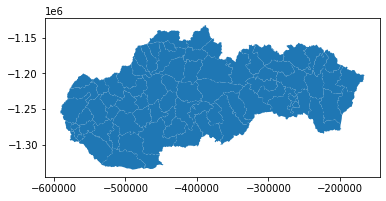

In [19]:
okresy.plot()
pass

### Choropleth map of village density in districts

* Add `hustota` Series as a new column to `okresy` GeoPandas DataFrame
* Then plot the map again, each district colored by village density

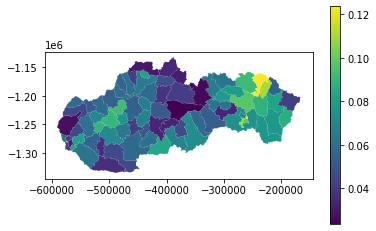

In [20]:
okresy.set_index('LAU1', inplace=True)
okresy['hustota'] = hustota
okresy.plot(column='hustota', legend=True);

### Maps in Plotly Express

Maps can be also drawn in Plotly Express
* Choropleth maps: https://plotly.com/python/choropleth-maps/
* Scatterplots on maps: https://plotly.com/python/scatter-plots-on-maps/
* You may need to upgrade Plotly with `!pip install plotly==4.14.3`

## Graphs and hierarchies in Pyvis

* Pyvis is a library for interactive visualization of graphs (networks) and trees (hierarchies)
* https://pyvis.readthedocs.io/en/latest/

In [21]:
# install pyvis library for graph visualization
!pip install pyvis

In [22]:
from pyvis.network import Network
# technical trick to make pyvis work in Jupyter
def net_repr_html(self):
  nodes, edges, something, height, width, options = self.get_network_data()
  html = self.template.render(height=height, width=width, nodes=nodes, edges=edges, options=options)
  return html

Network._repr_html_ = net_repr_html

### Displaying a simple hierarchy

* We create a simple tree representing taxonomy of selected ungulates (kopytníky).
* Data frame created below describes each node, giving its name, parent, level along the tree (leaves are 1, root is 5) and category, which is `land` for land animals, `sea` for sea animals and `group` for taxonomy groups.

In [27]:
from io import StringIO

animal_csv = StringIO("""name,parent,level,category
camel,Ungulata,1,land
dolphin,Cetacea,1,sea
whale,Cetacea,1,sea
cow,Bovidae,1,land
sheep,Caprinae,1,land
goat,Caprinae,1,land
Caprinae,Bovidae,2,group
Bovidae,Cetartiodactyla,3,group
Cetartiodactyla,Ungulata,4,group
Cetacea,Cetartiodactyla,2,group
Ungulata,,5,group""")

animals = pd.read_csv(animal_csv)
display(animals)


,name,parent,level,category
0,camel,Ungulata,1,land
1,dolphin,Cetacea,1,sea
2,whale,Cetacea,1,sea
3,cow,Bovidae,1,land
4,sheep,Caprinae,1,land
5,goat,Caprinae,1,land
6,Caprinae,Bovidae,2,group
7,Bovidae,Cetartiodactyla,3,group
8,Cetartiodactyla,Ungulata,4,group
9,Cetacea,Cetartiodactyla,2,group


In [28]:
# now we create and display the network
net = Network("500px", "500px", notebook=True, layout=True, directed=True)
# adding each table row as a node
for index, row in animals.iterrows():
  net.add_node(row['name'], level=row['level'])
# adding an edge to each node from its parent
for index, row in animals.iterrows():
  if row['parent'] is not np.nan:
    net.add_edge(row['parent'], row['name'])
# displaying the network
display(net)

<class 'pyvis.network.Network'> |N|=11 |E|=10

### Other graphs

* For non-hierarchical graphs, do not use `layout=True` and `level`.
* Here we use an example network from the [NetworkX](https://networkx.org/documentation/stable/index.html) library
* It represents [character co-occurence](https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.les_miserables_graph.html#networkx.generators.social.les_miserables_graph) in the novel Les Misérables by Victor Hugo.


In [25]:
import networkx as nx
net2 = Network("500px", "500px", notebook=True)
net2.from_nx(nx.les_miserables_graph())
display(net2)

<class 'pyvis.network.Network'> |N|=77 |E|=254

## Hierarchy as a Treemap in Plotly Express

* https://plotly.com/python/treemaps/

In [26]:
import plotly.express as px
fig = px.treemap(
    names = animals['name'],
    parents =animals['parent'],
    color = animals['category']
)
fig.show()